In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [4]:
enroll = pd.read_csv("enrollment.csv")
enroll.head()

,BirthYear,Births,EnrollmentYear,Enrollment
0,1950,3632000,1970,7368644.0
1,1955,4097000,1975,9679455.0
2,1960,4257850,1980,10475055.0
3,1965,3760358,1985,10596674.0
4,1966,3606274,1986,10797975.0


In [5]:
enroll.Births = enroll.Births / 1000000
enroll.Enrollment = enroll.Enrollment / 1000000
enroll.head()

,BirthYear,Births,EnrollmentYear,Enrollment
0,1950,3.632000,1970,7.368644
1,1955,4.097000,1975,9.679455
2,1960,4.257850,1980,10.475055
3,1965,3.760358,1985,10.596674
4,1966,3.606274,1986,10.797975


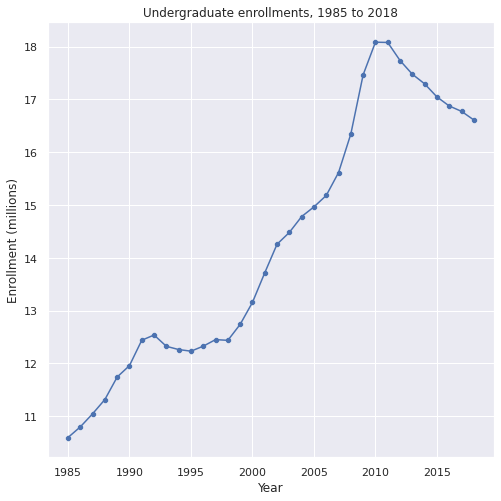

In [6]:
trend = enroll.query("EnrollmentYear > 1980 & EnrollmentYear < 2019")
sns.lineplot( data=trend, x="EnrollmentYear", y="Enrollment")
sns.scatterplot( data=trend, x="EnrollmentYear", y="Enrollment")
plt.title("Undergraduate enrollments, 1985 to 2018")
plt.xlabel("Year")
plt.ylabel("Enrollment (millions)")
plt.savefig("annual_enrollments.png")

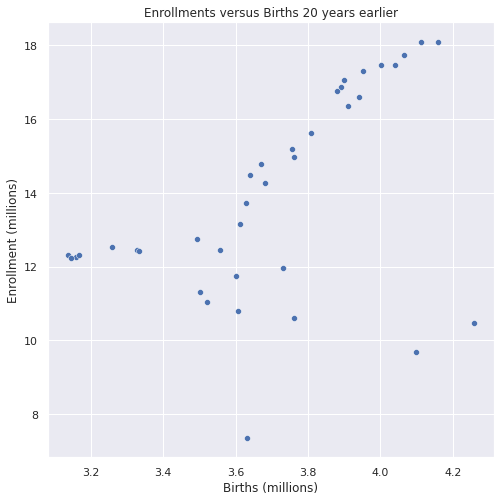

In [7]:
train = enroll.query("BirthYear < 1999")
sns.scatterplot(data=train, x="Births", y="Enrollment")
plt.title("Enrollments versus Births 20 years earlier")
plt.xlabel("Births (millions)")
plt.ylabel("Enrollment (millions)")
plt.savefig("enrollment_births.png")

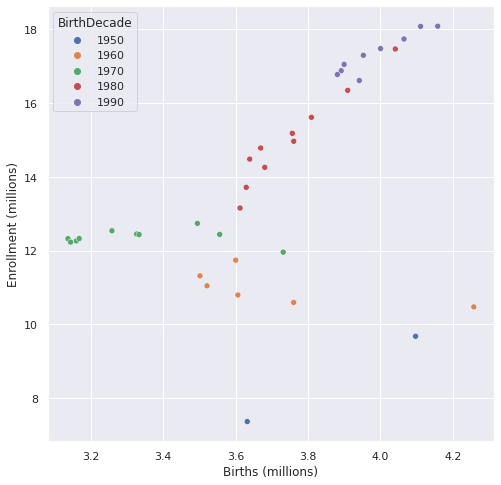

In [8]:
train = train.assign( BirthDecade = train.BirthYear - (train.BirthYear % 10) )
train.BirthDecade = train.BirthDecade.astype("category")
sns.scatterplot(data=train, x="Births", y="Enrollment", hue="BirthDecade")
plt.xlabel("Births (millions)")
plt.ylabel("Enrollment (millions)")
plt.savefig("enrollment_births_decade.png")

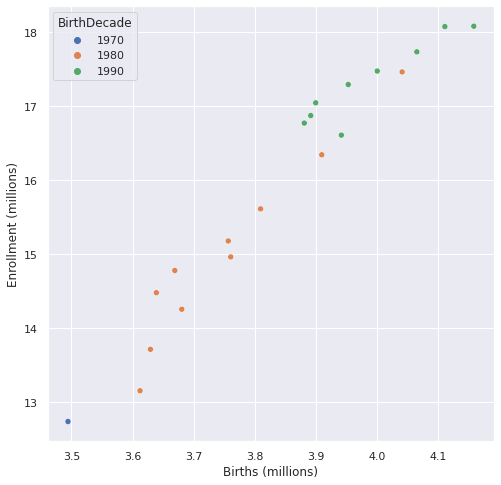

In [9]:
train = train.query("BirthYear > 1978")
train.BirthDecade = train.BirthDecade.cat.remove_unused_categories()
sns.scatterplot(data=train, x="Births", y="Enrollment", hue="BirthDecade")
plt.xlabel("Births (millions)")
plt.ylabel("Enrollment (millions)")
plt.savefig("enrollment_births_80s.png")

In [10]:
train.Births.corr( train.Enrollment )

0.9741680367357998

In [11]:
train_model = smf.ols("Enrollment ~ Births", data=train)
train_fit = train_model.fit()
train_fit.params

Intercept   -17.912152
Births        8.802197
dtype: float64

In [12]:
train_fit.rsquared

0.9490033637976821

In [13]:
np.sqrt( train_fit.scale )

0.388207377323538

In [14]:
predictions = enroll.query("BirthYear > 1998").filter(["BirthYear","Births","EnrollmentYear"])
predictions = predictions.assign( Enrollment = train_fit.predict( predictions.Births ) )
predictions

,BirthYear,Births,EnrollmentYear,Enrollment
37,1999,3.959417,2019,16.939416
38,2000,4.058814,2020,17.814328
39,2001,4.025933,2021,17.524903
40,2002,4.021726,2022,17.487872
41,2003,4.089950,2023,18.088393
42,2004,4.112052,2024,18.282940
43,2005,4.138349,2025,18.514411
44,2006,4.265555,2026,19.634103
45,2007,4.316233,2027,20.080181
46,2008,4.247694,2028,19.476887


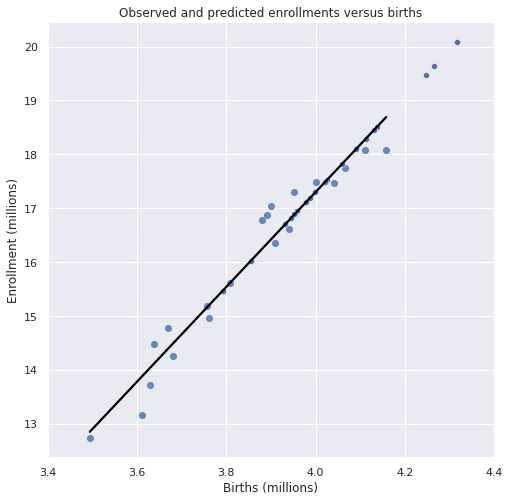

In [15]:
sns.regplot(data=train, x="Births", y="Enrollment", ci=None, line_kws={"color":"black"})
sns.scatterplot(data=predictions, x="Births", y="Enrollment")
plt.xlim(3.4,4.4)
plt.xlabel("Births (millions)")
plt.ylabel("Enrollment (millions)")
plt.title("Observed and predicted enrollments versus births")
plt.savefig("predicted_enrollments.png")

In [16]:
predictions.query("Enrollment > 19")

,BirthYear,Births,EnrollmentYear,Enrollment
44,2006,4.265555,2026,19.634103
45,2007,4.316233,2027,20.080181
46,2008,4.247694,2028,19.476887


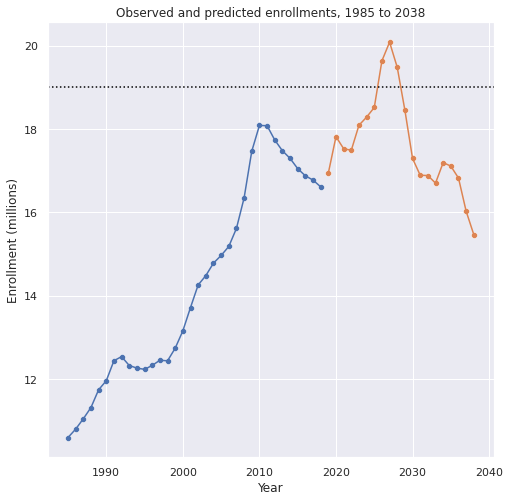

In [17]:
sns.lineplot( data=trend, x="EnrollmentYear", y="Enrollment")
sns.scatterplot( data=trend, x="EnrollmentYear", y="Enrollment")
sns.lineplot( data=predictions, x="EnrollmentYear", y="Enrollment")
sns.scatterplot( data=predictions, x="EnrollmentYear", y="Enrollment")
plt.axhline( 19, linestyle=":", color="black")
plt.title("Observed and predicted enrollments, 1985 to 2038")
plt.xlabel("Year")
plt.ylabel("Enrollment (millions)")
plt.savefig("combined_enrollments.png")